# Credit Scoring Classification
Classify credit scores using a dataset of customer information.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv('bank.csv', delimiter=';')

# Display basic information
df.info()
df.describe()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Data Preprocessing

In [3]:
# Handle missing values (if any)
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Selection

In [4]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Cross-validation to compare models
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f}")


Logistic Regression: 0.8859
Random Forest: 0.8944
SVM: 0.8910


## Model Training

In [5]:
# Train the best model (let's assume Random Forest performs best)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)


RandomForestClassifier()

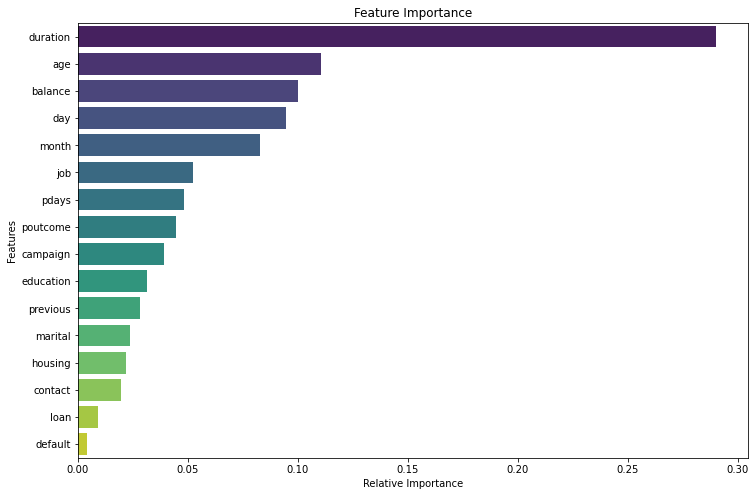

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()


## Model Evaluation

Accuracy: 0.8990
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1205
           1       0.61      0.27      0.37       152

    accuracy                           0.90      1357
   macro avg       0.76      0.62      0.66      1357
weighted avg       0.88      0.90      0.88      1357



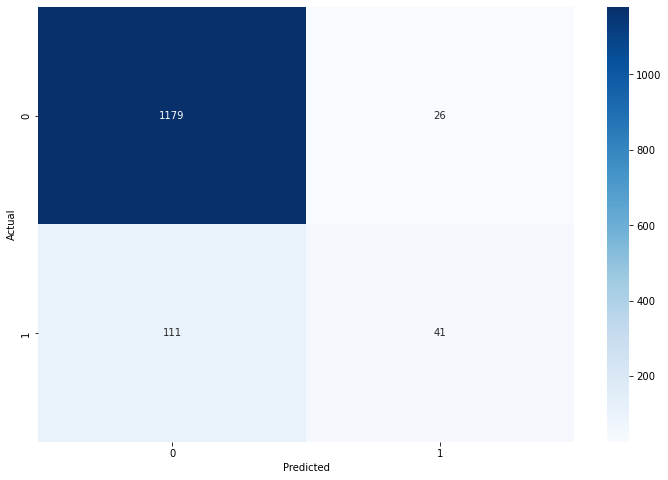

In [7]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Prediction on New Data

In [9]:
import pandas as pd

# Example: Predicting for a new customer
new_data = pd.DataFrame(
    np.array([[35, 1, 0, 2, 0, 12000, 0, 0, 1, 15, 7, 850, 2, 0, 0, 1]]),
    columns=X.columns
)

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict the credit score
prediction = best_model.predict(new_data_scaled)
print(f"Predicted Outcome: {prediction[0]}")
if prediction[0]==1:
    print("Credit Worthy: Yes")
else:
    print("Credit Worthy: No")




Predicted Outcome: 1
Credit Worthy: Yes
